In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image  
import pydotplus

In [2]:
data=pd.read_excel('Play_Yes_No.xlsx')
X = data.iloc[:,:4].values
y = data['Play cricket'].values

In [6]:
X

array([['Sunny', 'Hot', 'High', 'Weak'],
       ['Sunny', 'Hot', 'High', 'Strong'],
       ['Overcast', 'Hot', 'High', 'Weak'],
       ['Rain', 'Mild', 'High', 'Weak'],
       ['Rain', 'Cool', 'Normal', 'Weak'],
       ['Rain', 'Cool', 'Normal', 'Strong'],
       ['Overcast', 'Cool', 'Normal', 'Weak'],
       ['Sunny', 'Mild', 'High', 'Weak'],
       ['Sunny', 'Cool', 'Normal', 'Weak'],
       ['Rain', 'Mild', 'Normal', 'Strong'],
       ['Sunny', 'Mild', 'Normal', 'Strong'],
       ['Overcast', 'Mild', 'High', 'Strong'],
       ['Overcast', 'Hot', 'Normal', 'Weak'],
       ['Rain', 'Mild', 'High', 'Strong']], dtype=object)

In [8]:
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [3]:
data

,Outlook,Temp,Humidity,Wind,Play cricket
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Weak,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Strong,Yes


In [4]:
data.sort_values(by='Play cricket')

,Outlook,Temp,Humidity,Wind,Play cricket
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
5,Rain,Cool,Normal,Strong,No
7,Sunny,Mild,High,Weak,No
13,Rain,Mild,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
6,Overcast,Cool,Normal,Weak,Yes
8,Sunny,Cool,Normal,Weak,Yes


In [5]:
X

array([['Sunny', 'Hot', 'High', 'Weak'],
       ['Sunny', 'Hot', 'High', 'Strong'],
       ['Overcast', 'Hot', 'High', 'Weak'],
       ['Rain', 'Mild', 'High', 'Weak'],
       ['Rain', 'Cool', 'Normal', 'Weak'],
       ['Rain', 'Cool', 'Normal', 'Strong'],
       ['Overcast', 'Cool', 'Normal', 'Weak'],
       ['Sunny', 'Mild', 'High', 'Weak'],
       ['Sunny', 'Cool', 'Normal', 'Weak'],
       ['Rain', 'Mild', 'Normal', 'Strong'],
       ['Sunny', 'Mild', 'Normal', 'Strong'],
       ['Overcast', 'Mild', 'High', 'Strong'],
       ['Overcast', 'Hot', 'Normal', 'Weak'],
       ['Rain', 'Mild', 'High', 'Strong']], dtype=object)

In [6]:
X.shape

(14, 4)

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [7]:
from sklearn.preprocessing import LabelEncoder  # Encoding library call
enc = LabelEncoder()

In [81]:
for i in range(4):
    label_encoder = enc.fit(X[:,i])
    t = label_encoder.transform(X[:,i])
    print ("Categorical classes:",label_encoder.classes_)
    integer_classes = label_encoder.transform(label_encoder.classes_)
    print ("Integer classes:", integer_classes)
    X[:,i] = t
    ## Encoding all the feature in loop

Categorical classes: ['Overcast' 'Rain' 'Sunny']
Integer classes: [0 1 2]
Categorical classes: ['Cool' 'Hot' 'Mild']
Integer classes: [0 1 2]
Categorical classes: ['High' 'Normal']
Integer classes: [0 1]
Categorical classes: ['Strong' 'Weak']
Integer classes: [0 1]


In [59]:
X

array([[2, 1, 0, 1],
       [2, 1, 0, 0],
       [0, 1, 0, 1],
       [1, 2, 0, 1],
       [1, 0, 1, 1],
       [1, 0, 1, 0],
       [0, 0, 1, 1],
       [2, 2, 0, 1],
       [2, 0, 1, 1],
       [1, 2, 1, 0],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]], dtype=object)

In [42]:
y

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [70]:
## for example encoding y
label_encoder_y = enc.fit(y)
t1 = label_encoder.transform(y)
t1

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [71]:
enc.inverse_transform(t1) # Again inversing the encoding

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [73]:
print ("Categorical classes:", label_encoder_y.classes_)
integer_classes = label_encoder.transform(label_encoder_y.classes_)
print ("Integer classes:", integer_classes)

Categorical classes: ['No' 'Yes']
Integer classes: [0 1]


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
# Create decision tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Train model
model = clf.fit(X, y)

For predicting take a sample as below
####### Sunny	Hot	 High	Strong 	output>    No
           2     1     0      0

In [82]:
clf.predict([[2,1,0,0]]) # prediction

array(['No'], dtype=object)

In [85]:
clf.predict_proba([[2,1,0,0]])

array([[1., 0.]])

## Plotting the tree

In [60]:
target_names=np.array(['No', 'Yes'])

In [61]:
feature_names=np.array(['Outlook','Temperture','Humidity','Wind'])

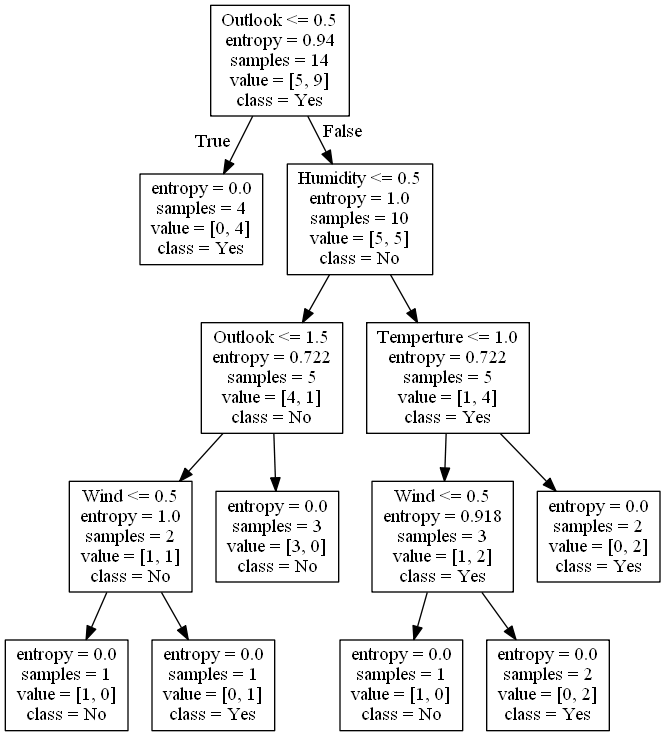

In [65]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=target_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Practice Problem:1.Preprocessing of Data 2. Application of ML:Decision Tree
https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset/output